In [ ]:
#Классификация

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fatemehmehrparvar_obesity_levels_path = kagglehub.dataset_download('fatemehmehrparvar/obesity-levels')

print('Data source import complete.')


Using Colab cache for faster access to the 'obesity-levels' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv
/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
df =  pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')


#общаяя информация о таблице
df.info()
print(df.isnull().sum()) # смотрим на пропуски
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Посмотрим на значения в object столбцах, ибо возможно null в виде строки лежит
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



Как можно увидеть, тут нет null значений, только object столбцы - заменим их на onecode enocoding,дабы модель могла сработать в baseline. Для таргета




In [ ]:
df.select_dtypes(include=['object']).columns
print(df.select_dtypes(include=['object']).columns)

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df,columns=['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],drop_first=True)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,False,...,False,False,True,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,False,...,True,True,True,False,True,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,True,...,False,False,True,False,True,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,True,...,False,False,False,False,True,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   NObeyesdad                          2111 non-null   object 
 9   Gender_Male                         2111 non-null   bool   
 10  CALC_Frequently                     2111 non-null   bool   
 11  CALC_Sometimes                      2111 no

In [ ]:
#Выделяем признаки и таргет
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная

In [ ]:
#Закодируем через Label encoding результирующую переменную,дабы принял алгоритм

In [ ]:
le = LabelEncoder()
y_transformed = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (1688, 23)
Размер тестовой выборки: (423, 23)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
tree_baseline = RandomForestClassifier()#Классификатор - случайный лес
tree_baseline.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_tree = tree_baseline.predict(X_test)

# Метрики
knn_accuracy = accuracy_score(y_test, y_pred_tree)
knn_f1 = f1_score(y_test, y_pred_tree, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.9362
F1-Score: 0.9375

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.76      0.95      0.85        58
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.84      0.88        58
Overweight_Level_II       0.98      0.88      0.93        58

           accuracy                           0.94       423
          macro avg       0.94      0.93      0.94       423
       weighted avg       0.94      0.94      0.94       423



In [ ]:
#Улучшим baseline
#Гипотезы:
#1 Добавление  scaler для нормализации числовых признаков улучшит производительность
#2 Можно варировать число n_neighbors для KNN как гиперпараметр, используя grid search.
#3 Можно сделать дополнительный признак в виде возрастных групп  и дополнительный признак в виде индекса массы тела(BMI)
#4 Можно избавиться от высоко корелирующих признаков(>0.9)

In [ ]:
# Гипотеза 1: Нормализация
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score

# Разные методы нормализации
scalers = {
    'NONE': None,
    'StandardScaler': StandardScaler(), #(x - mean) / sqrt(disp)
    'MinMaxScaler': MinMaxScaler(),  #(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) *(max - min) + min
    'RobustScaler': RobustScaler() #(x-median)/(x25-x75)
}
print("\nГипотеза 1: Нормализация ")
for name, scaler in scalers.items():

    if name != 'NONE':
        X_scaled = scaler.fit_transform(X_train)
    else:
        X_scaled = X_train
    scores = cross_val_score(RandomForestClassifier(), X_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Гипотеза 1: Нормализация 
NONE: 0.9497 ± 0.0105
StandardScaler: 0.9419 ± 0.0103
MinMaxScaler: 0.9449 ± 0.0116
RobustScaler: 0.9473 ± 0.0080


In [ ]:



    #2 Гипотеза 2: Подбор оптимальных гиперпараметров
print("\nГипотеза 2: Подбор оптимального k")
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 7, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}
dt_classifier = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Best k:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)



Гипотеза 2: Подбор оптимального k
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best k: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.947289870595052


In [ ]:
# Гипотеза 3: Feature Engineering
print("\nГипотеза 3: Feature Engineering")
def prepare_features(df):
    df_processed = df.copy()

    # BMI категории
    def bmi_category(bmi):
        if bmi < 18.5: return 0
        elif 18.5 <= bmi < 25: return 1
        elif 25 <= bmi < 30: return 2
        elif 30 <= bmi < 35: return 3
        elif 35 <= bmi < 40: return 4
        else: return 5

    # Возрастные группы
    def age_group(age):
        if age < 20: return 0
        elif 20 <= age < 30: return 1
        elif 30 <= age < 45: return 2
        elif 45 <= age < 60: return 3
        else: return 4

    # Создаем новые признаки
    df_processed['BMI_category'] =  df_processed['Weight'] / (df_processed['Height'] ** 2)
    df_processed['Age_group'] = df_processed['Age'].apply(age_group)


    return df_processed
names = ['NONE','new_params']
for name in names:
  if name !='NONE':
    X_train_enhanced = prepare_features(X_train)
  else :
    X_train_enhanced = X_train
  scores = cross_val_score(RandomForestClassifier(), X_train_enhanced, y_train, cv=5, scoring='accuracy')
  print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Гипотеза 3: Feature Engineering
NONE: 0.9414 ± 0.0086
new_params: 0.9888 ± 0.0068



Гипотеза 4: 


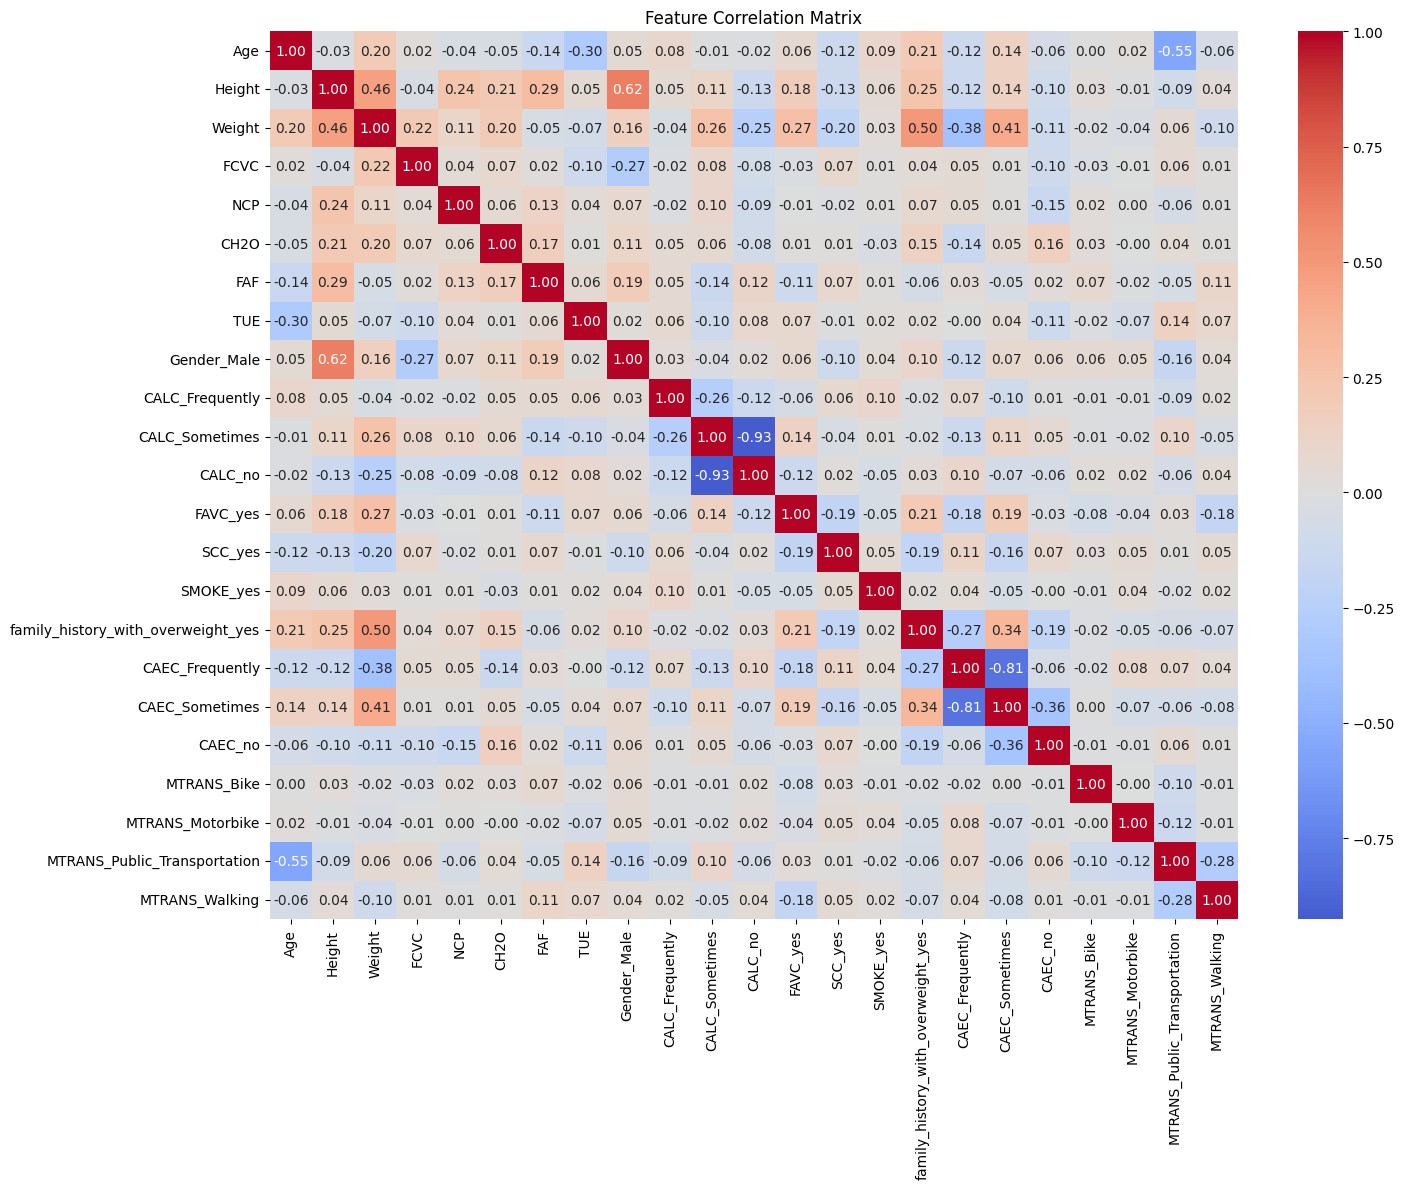

Features to drop due to high correlation: ['CALC_no', 'CAEC_Sometimes']


In [ ]:
print("\nГипотеза 4: ")

plt.figure(figsize=(15, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Посмотрим на высоко коррелированные признаки (>0.80)
corr_matrix = df.corr(numeric_only=True).abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print(f"Features to drop due to high correlation: {to_drop}")

Визуализировав данные, мы убеждаемся, что меж собой корелируют лишь столбцы, полученные через onehot encoding с другими вариантами ответа, что говорит о редкости получения отрицательных вариантов в этой категории. Гипотеза опровергнута: признаки не являются мультиколлинеарными

In [ ]:
#Улучшенный baseline
X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета

y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
tree_baseline = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
tree_baseline.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_tree = tree_baseline.predict(X_test)

# Метрики
knn_accuracy = accuracy_score(y_test, y_pred_tree)
knn_f1 = f1_score(y_test, y_pred_tree, average='weighted')

print("KNN Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

KNN Baseline Results:
Accuracy: 0.9787
F1-Score: 0.9788

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.92      0.98      0.95        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.93      0.96        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



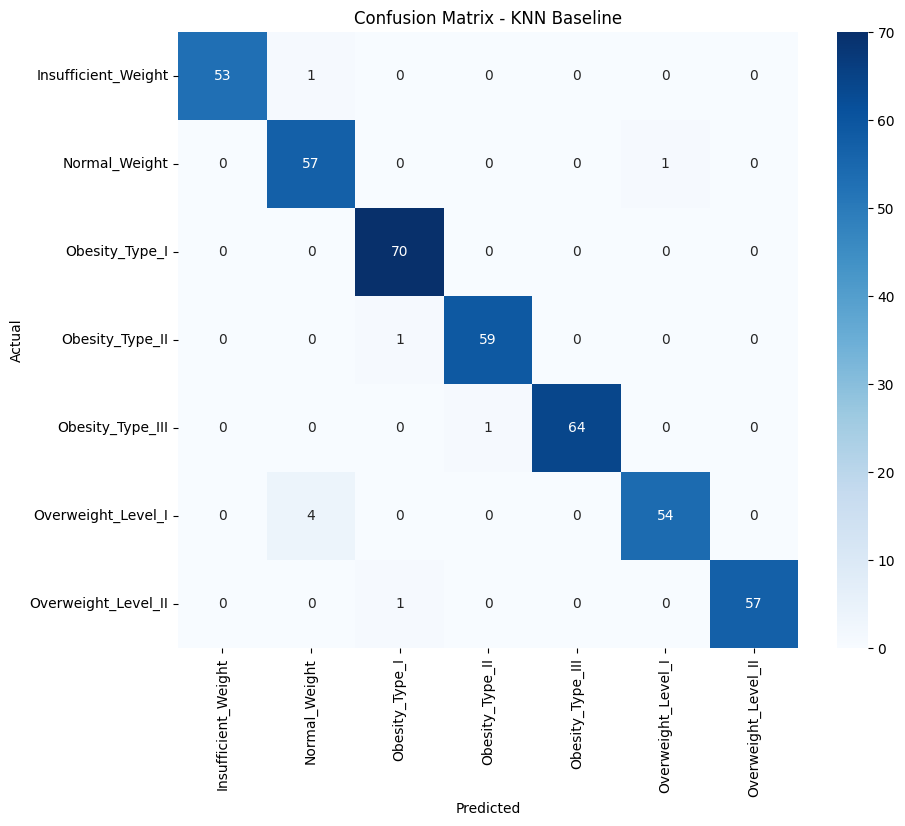

In [ ]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Выводы: Улучшения, основанные на гипотезах(всех, кроме Scalerов) помогли значительно увеличить все метрики(в частности accurasy и F1-меру)  и максимально приблизиться к хорошему по точности уровню для данного датасета при использовании. В основном помогло введение новых признаков, выигравшее 0.04 в точности и F1-мере, дав дереву новые признаки для более чёткого разделения классов по листьям.

Прогноз для случайного леса в случае классификации

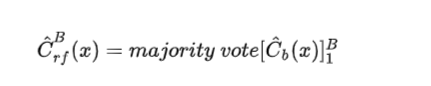

In [ ]:
#Возьмем деревья для классификации из предыдущей лабы(а для регресии я возьму sklearn)

In [ ]:
import numpy as np

class My_DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.tree = None

        if random_state is not None:
            np.random.seed(random_state)

    def _entropy(self, y):
        if len(y) == 0:
            return 0
        proportions = np.bincount(y) / len(y) #вероятность класса i
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _information_gain(self, y, y_left, y_right):
        p = len(y_left) / len(y)
        return self._entropy(y) - (p * self._entropy(y_left) + (1 - p) * self._entropy(y_right))#Прирост с бинарной классификацией подсчёта энетропии

    def _best_split(self, X, y):
        best_gain = -1
        best_split = {}
        n_samples, n_features = X.shape

        # Определяем, какие признаки использовать для поиска лучшего разбиения
        if self.max_features is None: #берем случайное число признаков(или все,если не задан max)
            feature_indices = range(n_features)
        elif isinstance(self.max_features, int):
            feature_indices = np.random.choice(n_features, size=min(self.max_features, n_features), replace=False)
        elif isinstance(self.max_features, float):
            n_selected = max(1, int(self.max_features * n_features))
            feature_indices = np.random.choice(n_features, size=n_selected, replace=False)
        else:
            raise ValueError("max_features must be int, float or None")

        for feature_index in feature_indices: #Перебор порогов
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                y_left = y[left_mask]
                y_right = y[~left_mask]

                if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf: # Убеждаемся, что min_samples_leaf
                    continue

                gain = self._information_gain(y, y_left, y_right)#Прирост информации по порогу
                if gain > best_gain:
                    best_gain = gain#выбор лучщего
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_mask': left_mask
                    }
        return best_split if best_gain > 0 else {}

    def _most_common_class(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def _build_tree(self, X, y, depth=0): #Рекурсивно строим дерево
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Критерии остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           (n_samples < self.min_samples_split) or \
           (n_classes == 1):
            return {'class': self._most_common_class(y)}

        # Поиск лучшего разбиения
        best_split = self._best_split(X, y)
        if not best_split:
            return {'class': self._most_common_class(y)}

        # Рекурсивное построение поддеревьев
        left_mask = best_split['left_mask']
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[~left_mask], y[~left_mask]

        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        self.tree = self._build_tree(X, y)
        return self

    def _predict_sample(self, sample, tree):#Идем по дереву
        if 'class' in tree:
            return tree['class']
        feature_val = sample[tree['feature_index']]
        if feature_val <= tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X])



In [ ]:
class My_RandomForestClassifier:
   def __init__(self, max_depth=None,n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=None, tree_base_random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree_base_random_state = tree_base_random_state
        self.trees = []

   def _bootstrap_sample(self, X, y):#Случайная выборка для обучения кадого из деревьев, с повторами
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]




   def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        for i in range(self.n_estimators):
            # Устанавливаем seed для воспроизводимости каждого дерева (если задан)
            tree_random_state =  None if self.tree_base_random_state is None else self.tree_base_random_state + i


            # Выбираем бутстрап-выборку
            X_boot, y_boot = self._bootstrap_sample(X, y)

            # Создаём дерево с заданными параметрами
            tree = My_DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features,
                random_state=tree_random_state if self.tree_base_random_state is not None else None
            )
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)
        return self

   def predict(self, X):
        X = np.array(X)
        # Собираем предсказания от всех деревьев
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Транспонируем, чтобы по каждой строке (образцу) были голоса
        predictions = predictions.T
        # Мажоритарное голосование
        return np.array([np.bincount(pred_row).argmax() for pred_row in predictions])



In [ ]:
#Cтандартный baseline
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:

my_baseline = My_RandomForestClassifier()


my_baseline.fit(X_train, y_train)

In [ ]:
y_pred =my_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(" Baseline Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 Baseline Results:
Accuracy: 0.9622
F1-Score: 0.9622

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.92        54
      Normal_Weight       0.90      0.93      0.92        58
     Obesity_Type_I       0.95      1.00      0.97        70
    Obesity_Type_II       1.00      0.97      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.95      0.96        58
Overweight_Level_II       0.97      0.98      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



Вывод: Полученная мною реализация совпадает с sklearn по метрикам, что указывает на правильную имплементацию алгоритма. Также, т.к. датасет для классификации представлен не слтшком большим объёмом данных, то мой подход(итеративное сдвижение tree_random_state) даёт более различный набор деревьев в лесу, чем случайный(как в sklearn), поэтому я слегка выигрываю на этих данных.


In [ ]:
#Улучшенный baseline
X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета

y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
X_train.shape[1]

25

In [ ]:
np.sqrt(X_train.shape[1])

np.float64(5.0)

In [ ]:
tree_baseline =  My_RandomForestClassifier(max_depth= None, max_features= int(np.sqrt(X_train.shape[1])), min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
tree_baseline.fit(X_train, y_train)

In [ ]:
y_pred =tree_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(" Baseline Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 Baseline Results:
Accuracy: 0.9811
F1-Score: 0.9811

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        54
      Normal_Weight       0.95      0.97      0.96        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.97      0.97      0.97        58
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



Вывод: Полученная мною реализация совпадает с sklearn по метрикам при условии дообработки данных, что указывает на правильную имплементацию алгоритма. Также,  мой подход(итеративное сдвижение tree_random_state) всё даёт более различный набор деревьев в лесу, чем случайный(как в sklearn), поэтому я слегка выигрываю на этих данных, но при этом на больших объёмах я буду из-за этого страдать.


In [1]:
#Регрессия

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
aslanahmedov_walmart_sales_forecast_path = kagglehub.dataset_download('aslanahmedov/walmart-sales-forecast')

print('Data source import complete.')

Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.
Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv


In [3]:

features = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")
test = pd.read_csv("/kaggle/input/walmart-sales-forecast/test.csv")


In [4]:
#Все столбцы с датами переведём из object к  более удобному datetime
for df in [features, train, test]:
    df["Date"] = pd.to_datetime(df["Date"])

In [5]:
train = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")#sql left join
train = train.merge(stores, on="Store", how="left")#sql left join

test = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left") #sql left join
test = test.merge(stores, on="Store", how="left")#sql left join

In [6]:
train_combined = train.copy()
test_combined = test.copy()
train_combined.fillna(0, inplace=True)

In [7]:
train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')#One-hot-encoding
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

In [8]:
#Бьем date на временные признаки для характеристики даты и отказа от строковой записи
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

In [9]:
feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')] #все фичи, без DATe+ target

In [10]:
available_features = [col for col in feature_columns if col in train_combined.columns]
print(f"Used features: {available_features}")

Used features: ['Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek', 'Type_A', 'Type_B', 'Type_C']


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")


Размер тренировочной выборки: (337256, 20)
Размер тестовой выборки: (84314, 20)


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
tree_baseline = RandomForestRegressor()
tree_baseline.fit(X_train_reg, y_train_reg)

RandomForestRegressor()

In [19]:

y_pred_reg = tree_baseline.predict(X_test_reg)

#Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.4f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")


KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА
R² (Коэффициент детерминации): 0.9741
MSE (Средняя квадратичная ошибка): 13492925.2790
MAE (Средняя абсолютная ошибка): 1441.1262
MAPE (Средняя абсолютная процентная ошибка): 366323634436316.8125
RMSE (Среднеквадратичная ошибка): 3673.2717


In [ ]:
# не везде могу убрать MApe - его заоблачные значения обеспечены тем, что в датасете присутствуют отрицательные и близкие к 0 числа, что ведёт к нестабильности

In [ ]:
#Улучшим baseline
#Гипотезы:
#1 Можно заменять данные с пропусками на средние и/или удалить строки или стобцы с ними и сравнить результаты
#2 Добавление  scaler для нормализации числовых признаков улучшит производительность
#3 Обработать выбросы в датасете, что позволит более точно выделить зависимость
#4 Можно добавить искусственнные доменные признаки, фичи, отвечающие за сезонность для улучшения обобщающей способности модели
#5 Удаление высококоррелирующих признаков

In [20]:
train_combined = train.copy()
test_combined = test.copy()

# Удаляем столбцы с MarkDown вместо удаления строк
columns_to_drop = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_combined = train_combined.drop(columns=columns_to_drop)
test_combined = test_combined.drop(columns=columns_to_drop)

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

train_combined.info()

# Бьем date на временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]
print(f"Used features: {available_features}")

from sklearn.model_selection import train_test_split

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

# Проверяем на наличие NaN после всех преобразований
print(f"\nПропуски в X_reg: {X_reg.isna().sum().sum()}")
print(f"Пропуски в y_reg: {y_reg.isna().sum()}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")



# Бейзлайн KNN регрессия
knn_regressor =RandomForestRegressor()

knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

# Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("KNN РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.4f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Size          421570 non-null  int64         
 10  Type_A        421570 non-null  bool          
 11  Type_B        421570 non-null  bool          
 12  Type_C        421570 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(5), int64(3)
memory usage: 30.6 MB
Used features: ['Store', 'Dept', 'Size', 'IsH

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse

In [22]:
print("Гипотеза 2: Добавление StandardScaler")
from sklearn.preprocessing import StandardScaler

# Используем лучший вариант без MarkDown
train_combined = train.copy()
test_combined = test.copy()

# Удаляем MarkDown столбцы (лучший результат)
train_combined = train_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_combined = test_combined.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Применяем StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

knn_scaler = RandomForestRegressor()
knn_scaler.fit(X_train_scaled, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_scaled)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "KNN СО STANDARDSCALER"
)

Гипотеза 2: Добавление StandardScaler

KNN СО STANDARDSCALER
R²: 0.9748
MSE: 13144687.49
MAE: 1430.00
MAPE: 165330254256089.3750
RMSE: 3625.56


In [15]:
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [16]:
from sklearn.model_selection import train_test_split

Гипотеза 3: Анализ и обработка выбросов


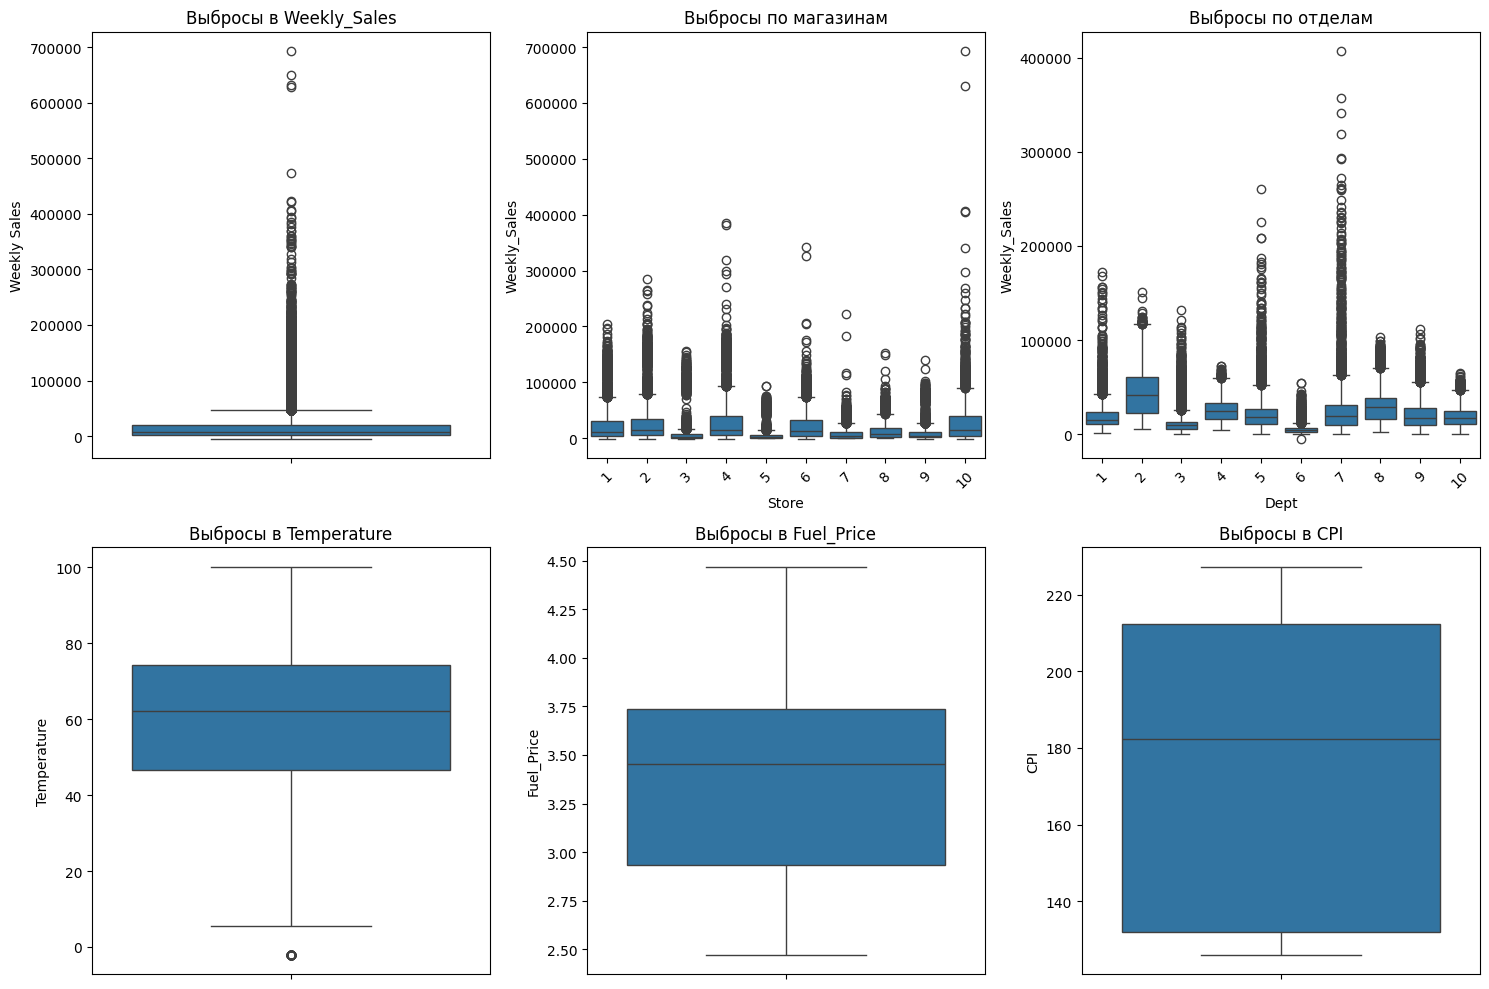


Количественный анализ выбросов (метод IQR):
Weekly_Sales   :  35521 выбросов ( 8.43%) [(-25109.65, 47395.16)]
Temperature    :     69 выбросов ( 0.02%) [(   5.28,  115.68)]
Fuel_Price     :      0 выбросов ( 0.00%) [(   1.73,    4.95)]
CPI            :      0 выбросов ( 0.00%) [(  11.43,  333.01)]
Unemployment   :  32114 выбросов ( 7.62%) [(   4.37,   11.09)]
Size           :      0 выбросов ( 0.00%) [(-69662.50, 365805.50)]

Гипотеза 9: Обработка выбросов в Weekly_Sales

Сравнение методов обработки выбросов:
Исходный размер данных: 421570
После winsorization: 421570
После удаления выбросов: 386049


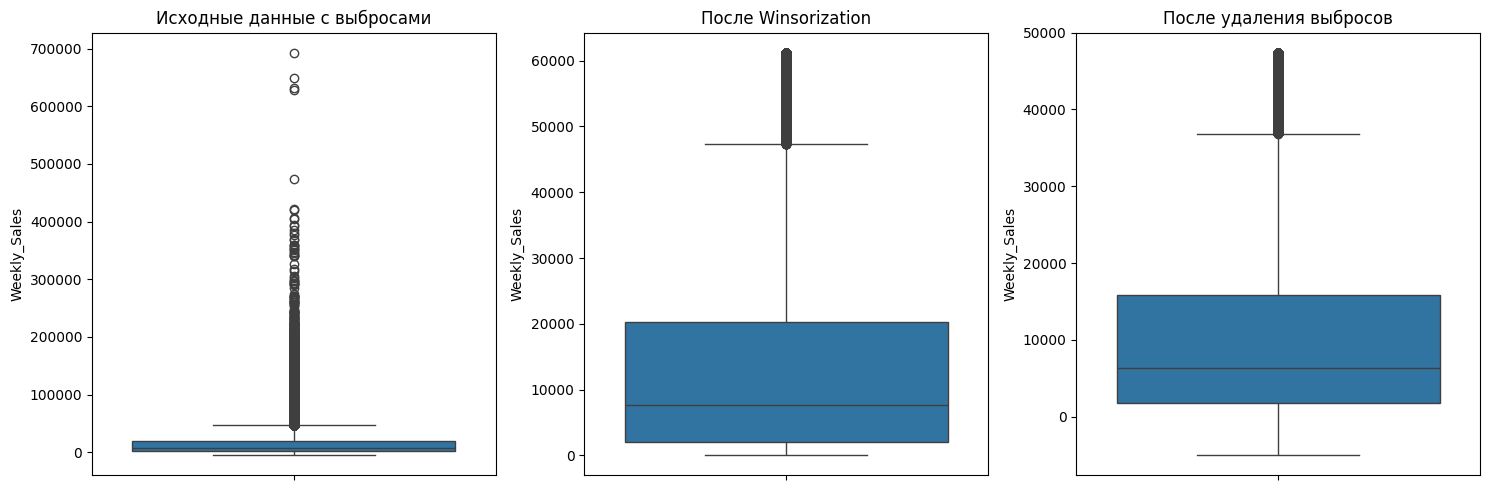


Сравнение методов обработки выбросов:
RMSE с исходными данными: 4349.9824
RMSE с winsorization: 2556.2948
RMSE с удалением выбросов: 2103.2132

 Лучший метод обработки выбросов: Удаление выбросов (RMSE = 2103.2132)

Анализ выбросов по праздничным дням:
Медиана продаж в праздники: 7947.74
Медиана продаж в обычные дни: 7589.95
Отношение: 1.05x


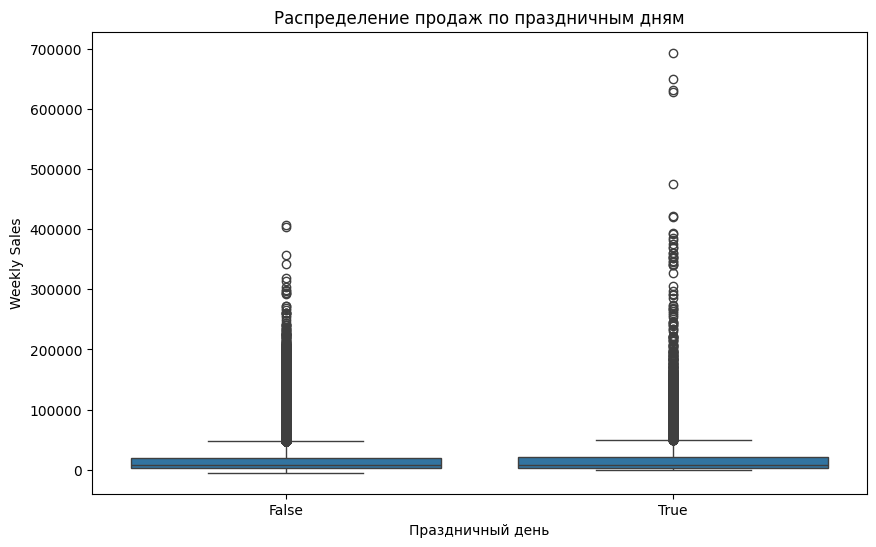


Экстремальные выбросы (>99% перцентиль): 4216 записей
Статистика по экстремальным выбросам:
  Магазины: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 34 35 39 40 41 42 43 45]
  Отделы: [ 7 38 72 90 92 95  5 82  2 23  1  3 14 18 40 46 55 16 91  9 11]
  Праздники: 9.39%


In [17]:
# Оценка выбросов через boxplot
import matplotlib.pyplot as plt
import seaborn as sns

print("Гипотеза 3: Анализ и обработка выбросов")

# Анализ выбросов в целевой переменной
plt.figure(figsize=(15, 10))

# 1. Boxplot Weekly_Sales
plt.subplot(2, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Выбросы в Weekly_Sales')
plt.ylabel('Weekly Sales')

# 2. Boxplot по магазинам
plt.subplot(2, 3, 2)
sample_stores = train['Store'].unique()[:10]  # первые 10 магазинов для наглядности
sns.boxplot(data=train[train['Store'].isin(sample_stores)], x='Store', y='Weekly_Sales')
plt.title('Выбросы по магазинам')
plt.xticks(rotation=45)

# 3. Boxplot по отделам
plt.subplot(2, 3, 3)
sample_depts = train['Dept'].unique()[:10]  # первые 10 отделов
sns.boxplot(data=train[train['Dept'].isin(sample_depts)], x='Dept', y='Weekly_Sales')
plt.title('Выбросы по отделам')
plt.xticks(rotation=45)

# 4. Boxplot числовых признаков
plt.subplot(2, 3, 4)
sns.boxplot(y=train['Temperature'])
plt.title('Выбросы в Temperature')

plt.subplot(2, 3, 5)
sns.boxplot(y=train['Fuel_Price'])
plt.title('Выбросы в Fuel_Price')

plt.subplot(2, 3, 6)
sns.boxplot(y=train['CPI'])
plt.title('Выбросы в CPI')

plt.tight_layout()
plt.show()

# Количественный анализ выбросов
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nКоличественный анализ выбросов (метод IQR):")
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

for col in numeric_columns:
    if col in train.columns:
        outliers_count, lower, upper = detect_outliers_iqr(train, col)
        percentage = (outliers_count / len(train)) * 100
        print(f"{col:<15}: {outliers_count:>6} выбросов ({percentage:5.2f}%) [({lower:7.2f}, {upper:7.2f})]")

# Гипотеза: Обработка выбросов в целевой переменной
print("\nГипотеза 9: Обработка выбросов в Weekly_Sales")

# Создаем копии для экспериментов с выбросами
train_no_outliers = train.copy()
test_no_outliers = test.copy()

# Метод 1: Winsorization (ограничение выбросов)
def winsorize_series(series, limits=(0.05, 0.05)):
    """Ограничивает выбросы перцентилями"""
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(1 - limits[1])
    return np.clip(series, lower_limit, upper_limit)

# Метод 2: Удаление выбросов
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nСравнение методов обработки выбросов:")

# Метод 1: Winsorization
train_winsorized = train.copy()
train_winsorized['Weekly_Sales'] = winsorize_series(train_winsorized['Weekly_Sales'])

# Метод 2: Удаление выбросов
train_cleaned = remove_outliers_iqr(train, 'Weekly_Sales')

print(f"Исходный размер данных: {len(train)}")
print(f"После winsorization: {len(train_winsorized)}")
print(f"После удаления выбросов: {len(train_cleaned)}")

# Визуализация результатов обработки выбросов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Исходные данные с выбросами')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_winsorized['Weekly_Sales'])
plt.title('После Winsorization')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_cleaned['Weekly_Sales'])
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()

# Тестируем оба метода на модели
def test_outlier_method(train_data, method_name):
    """Тестирует метод обработки выбросов"""
    temp_train = train_data.copy()

    # Применяем лучшие практики из предыдущих гипотез
    temp_train = temp_train.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
    temp_train = pd.get_dummies(temp_train, columns=['Type'], prefix='Type')

    # Базовые временные признаки
    temp_train['Year'] = temp_train['Date'].dt.year
    temp_train['Month'] = temp_train['Date'].dt.month
    temp_train['DayOfWeek'] = temp_train['Date'].dt.dayofweek

    feature_columns = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] + [col for col in temp_train.columns if col.startswith('Type_')]

    available_features = [col for col in feature_columns if col in temp_train.columns]

    X = temp_train[available_features]
    y = temp_train['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = RandomForestRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    r2 = rmse_scorer(y_test, y_pred)
    return r2

# Тестируем разные методы обработки выбросов
print("\nСравнение методов обработки выбросов:")
r2_original = test_outlier_method(train, "Исходные данные")
r2_winsorized = test_outlier_method(train_winsorized, "Winsorization")
r2_cleaned = test_outlier_method(train_cleaned, "Удаление выбросов")

print(f"RMSE с исходными данными: {r2_original:.4f}")
print(f"RMSE с winsorization: {r2_winsorized:.4f}")
print(f"RMSE с удалением выбросов: {r2_cleaned:.4f}")

# Определяем лучший метод
methods = {
    "Исходные данные": r2_original,
    "Winsorization": r2_winsorized,
    "Удаление выбросов": r2_cleaned
}

best_outlier_method = min(methods, key=methods.get)
print(f"\n Лучший метод обработки выбросов: {best_outlier_method} (RMSE = {methods[best_outlier_method]:.4f})")

# Дополнительный анализ: выбросы по праздничным дням
print("\nАнализ выбросов по праздничным дням:")
holiday_sales = train[train['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = train[train['IsHoliday'] == False]['Weekly_Sales']

print(f"Медиана продаж в праздники: {holiday_sales.median():.2f}")
print(f"Медиана продаж в обычные дни: {non_holiday_sales.median():.2f}")
print(f"Отношение: {holiday_sales.median() / non_holiday_sales.median():.2f}x")

# Визуализация распределения по праздникам
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title('Распределение продаж по праздничным дням')
plt.xlabel('Праздничный день')
plt.ylabel('Weekly Sales')
plt.show()

# Анализ экстремальных выбросов
extreme_outliers = train[train['Weekly_Sales'] > train['Weekly_Sales'].quantile(0.99)]
print(f"\nЭкстремальные выбросы (>99% перцентиль): {len(extreme_outliers)} записей")
print("Статистика по экстремальным выбросам:")
print(f"  Магазины: {extreme_outliers['Store'].unique()}")
print(f"  Отделы: {extreme_outliers['Dept'].unique()}")
print(f"  Праздники: {extreme_outliers['IsHoliday'].mean():.2%}")

In [21]:
print("Гипотеза 4: Доменные признаки (праздники, сезонность)")
train_domain = train.copy()
test_domain = test.copy()
#Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Удаляем MarkDown и высококоррелирующие признаки
train_domain = train_domain.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_domain = test_domain.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

train_domain = pd.get_dummies(train_domain, columns=['Type'], prefix='Type')
test_domain = pd.get_dummies(test_domain, columns=['Type'], prefix='Type')

# Базовые временные признаки
for df in [train_domain, test_domain]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    # Убираем Week из-за высокой корреляции

    # Доменные признаки
    df['IsDecember'] = (df['Month'] == 12).astype(int)
    df['IsQ4'] = (df['Month'].isin([10, 11, 12])).astype(int)
    df['IsSummer'] = (df['Month'].isin([6, 7, 8])).astype(int)
    df['IsWinter'] = (df['Month'].isin([12, 1, 2])).astype(int)

    # Признаки на основе температуры
    df['IsHot'] = (df['Temperature'] > 30).astype(int)
    df['IsCold'] = (df['Temperature'] < 5).astype(int)

    # Признаки экономической активности
    df['CPI_High'] = (df['CPI'] > df['CPI'].median()).astype(int)
    df['Unemployment_High'] = (df['Unemployment'] > df['Unemployment'].median()).astype(int)

feature_columns_domain = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek',
    'IsDecember', 'IsQ4', 'IsSummer', 'IsWinter', 'IsHot', 'IsCold',
    'CPI_High', 'Unemployment_High'
] + [col for col in train_domain.columns if col.startswith('Type_')]

available_features_domain = [col for col in feature_columns_domain if col in train_domain.columns]

X_domain = train_domain[available_features_domain]
y_domain = train_domain['Weekly_Sales']

X_train_dom, X_test_dom, y_train_dom, y_test_dom = train_test_split(
    X_domain, y_domain, test_size=0.2, random_state=42
)

knn_domain = RandomForestRegressor()
knn_domain.fit(X_train_dom, y_train_dom)
y_pred_domain = knn_domain.predict(X_test_dom)

r2_domain, mse_domain, mae_domain, mape_domain, rmse_domain = evaluate_model(
    y_test_dom, y_pred_domain, "KNN С ДОМЕННЫМИ ПРИЗНАКАМИ"
)


Гипотеза 4: Доменные признаки (праздники, сезонность)

KNN С ДОМЕННЫМИ ПРИЗНАКАМИ
R²: 0.9636
MSE: 18973273.61
MAE: 1637.01
MAPE: 329403518463656.1250
RMSE: 4355.83


In [22]:
# Гипотеза 5: Удаление высококоррелирующих признаков
print("\nГипотеза 5: Удаление высококоррелирующих признаков")
# Используем базовый набор признаков (без расширенных временных)
X_corr = train_combined[available_features]

# Вычисляем корреляционную матрицу
corr_matrix = X_corr.corr().abs()

# Верхний треугольник матрицы корреляции
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим признаки с корреляцией > 0.9
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(f"Высококоррелирующие признаки (>0.9): {high_corr_features}")

# Удаляем высококоррелирующие признаки
X_low_corr = X_corr.drop(columns=high_corr_features, errors='ignore')

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_low_corr, y_reg, test_size=0.2, random_state=42
)

# Масштабируем

X_train_corr_scaled = X_train_corr
X_test_corr_scaled = X_test_corr

knn_corr = RandomForestRegressor()
knn_corr.fit(X_train_corr_scaled, y_train_corr)
y_pred_corr = knn_corr.predict(X_test_corr_scaled)

r2_corr, mse_corr, mae_corr, mape_corr, rmse_corr = evaluate_model(
    y_test_corr, y_pred_corr, "KNN БЕЗ ВЫСОКОКОРРЕЛИРУЮЩИХ ПРИЗНАКОВ"
)


Гипотеза 5: Удаление высококоррелирующих признаков
Высококоррелирующие признаки (>0.9): ['Week']

KNN БЕЗ ВЫСОКОКОРРЕЛИРУЮЩИХ ПРИЗНАКОВ
R²: 0.9648
MSE: 18371403.59
MAE: 1614.46
MAPE: 320804139774360.8750
RMSE: 4286.19


In [ ]:
print("="*80)
print("ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН")
print("="*80)

# Комбинируем проверенные лучшие подходы
train_final = train.copy()
test_final = test.copy()

print("ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:")
print("1. Удаление выбросов в целевой переменной...")
# Удаляем выбросы по IQR методу (лучший результат)
train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

print("2. Удаление MarkDown столбцов...")
train_final = train_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_final = test_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

print("3. Добавление доменных признаков...")
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')
test_final = pd.get_dummies(test_final, columns=['Type'], prefix='Type')


for df in [train_final, test_final]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek



print("4. Формирование финального набора признаков...")
№
feature_columns_final = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] +  [col for col in train_final.columns if col.startswith('Type_')]

available_features_final = [col for col in feature_columns_final if col in train_final.columns]

print(f"Итоговый набор признаков ({len(available_features_final)}):")
for i, feature in enumerate(available_features_final, 1):
    print(f"  {i:2d}. {feature}")

# Подготовка данных для обучения
X_final = train_final[available_features_final]
y_final = train_final['Weekly_Sales']
sc=StandardScaler()
X_final=sc.fit_transform(X_final)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=33
)

print(f"\nРазмеры данных после обработки:")
print(f"  Обучающая выборка: {X_train_final.shape[0]} записей, {X_train_final.shape[1]} признаков")
print(f"  Тестовая выборка:  {X_test_final.shape[0]} записей")
print(f"  Целевая переменная: от {y_final.min():.2f} до {y_final.max():.2f}")

# Обучение финальной модели
print("\n5. Обучение финальной модели KNN...")
knn_final = RandomForestRegressor()
knn_final.fit(X_train_final, y_train_final)

# Предсказания и оценка
y_pred_final = knn_final.predict(X_test_final)

r2_final = r2_score(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mse_final)



print("\n" + "="*80)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА")
print("="*80)
print(f"R²: {r2_final:.4f}")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"RMSE: {rmse_final:.2f}")

evaluate_model(y_test_final, y_pred_final,"FINAl")

ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН
ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:
1. Удаление выбросов в целевой переменной...
2. Удаление MarkDown столбцов...
3. Добавление доменных признаков...
4. Формирование финального набора признаков...
Итоговый набор признаков (14):
   1. Store
   2. Dept
   3. Size
   4. IsHoliday
   5. Temperature
   6. Fuel_Price
   7. CPI
   8. Unemployment
   9. Year
  10. Month
  11. DayOfWeek
  12. Type_A
  13. Type_B
  14. Type_C

Размеры данных после обработки:
  Обучающая выборка: 308839 записей, 14 признаков
  Тестовая выборка:  77210 записей
  Целевая переменная: от -4988.94 до 47393.43

5. Обучение финальной модели KNN...

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА
R²: 0.9661
MSE: 4341260.50
MAE: 1079.31
RMSE: 2083.57

FINAl
R²: 0.9661
MSE: 4341260.50
MAE: 1079.31
MAPE: 220331224372487.7812
RMSE: 2083.57


(0.9661200574954842,
 4341260.497344571,
 1079.309219967621,
 220331224372487.78,
 np.float64(2083.569172680516))

Вывод: Улучшения, основанные в основном на 2 и 3 гипотезах помогли значительно увеличить все метрики и максимально приблизиться к отличному по точности уровню для данного датасета при использовани. В основном помогла работа с выбросами(их удаление), которая привела к сильному уменьшению метрик.

In [ ]:
#Напишем реализацию случайного леса для регрессии и будем использовать Sklearn деревья из-за их оптимизации и быстроты инициализации

In [ ]:
from sklearn.tree import  DecisionTreeRegressor

In [ ]:
class My_RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2,
                 min_samples_leaf=1, max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)

        if self.random_state is not None:
            np.random.seed(self.random_state)

        for i in range(self.n_estimators):
            # Уникальный seed для каждого дерева (опционально)
            tree_random_state = None
            if self.random_state is not None:
                tree_random_state = self.random_state + i

            # Bootstrap выборка
            X_boot, y_boot = self._bootstrap_sample(X, y)

            # Создаём дерево регрессии
            #tree = My_DecisionTreeRegressor(
            #   max_depth=self.max_depth,
            #    min_samples_split=self.min_samples_split,
            #    min_samples_leaf=self.min_samples_leaf,
             #   max_features=self.max_features,
            #    random_state=tree_random_state
            #)

            tree =DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features,
                random_state=tree_random_state

            )
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)
        return self

    def predict(self, X):
        X = np.array(X)
        # Получаем предсказания от всех деревьев
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Усредняем по деревьям (по оси 0)
        return np.mean(predictions, axis=0)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
from sklearn.preprocessing import StandardScaler

train_combined = train.copy()
test_combined = test.copy()


train_combined.fillna(0, inplace=True)
test_combined.fillna(0, inplace=True)


train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

# Временные признаки
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')]

available_features = [col for col in feature_columns if col in train_combined.columns]

X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)



knn_scaler = My_RandomForestRegressor()
knn_scaler.fit(X_train_reg, y_train_reg)
y_pred_scaler = knn_scaler.predict(X_test_reg)

r2_scaler, mse_scaler, mae_scaler, mape_scaler, rmse_scaler = evaluate_model(
    y_test_reg, y_pred_scaler, "Base Realization"
)


Base Realization
R²: 0.9743
MSE: 13402156.95
MAE: 1432.76
MAPE: 251595798672399.4688
RMSE: 3660.90


 Вывод: полученная нами реализация случайного леса в базовой имплементации находится на уровне с библиотечной,   представляя собой практически эквивалентную альтернативу с точки зрения качества предсказаний,что одостигается за счет бутстрап-агрегирования и каноничных решающих деревьев.

In [ ]:
print("="*80)
print("ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН")
print("="*80)

# Комбинируем проверенные лучшие подходы
train_final = train.copy()
test_final = test.copy()

print("ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:")
print("1. Удаление выбросов в целевой переменной...")
# Удаляем выбросы по IQR методу (лучший результат)
train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

print("2. Удаление MarkDown столбцов...")
train_final = train_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_final = test_final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

print("3. Добавление доменных признаков...")
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')
test_final = pd.get_dummies(test_final, columns=['Type'], prefix='Type')


for df in [train_final, test_final]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek



print("4. Формирование финального набора признаков...")

feature_columns_final = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] +  [col for col in train_final.columns if col.startswith('Type_')]

available_features_final = [col for col in feature_columns_final if col in train_final.columns]

print(f"Итоговый набор признаков ({len(available_features_final)}):")
for i, feature in enumerate(available_features_final, 1):
    print(f"  {i:2d}. {feature}")

# Подготовка данных для обучения
X_final = train_final[available_features_final]
y_final = train_final['Weekly_Sales']
sc=StandardScaler()
X_final=sc.fit_transform(X_final)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=33
)

print(f"\nРазмеры данных после обработки:")
print(f"  Обучающая выборка: {X_train_final.shape[0]} записей, {X_train_final.shape[1]} признаков")
print(f"  Тестовая выборка:  {X_test_final.shape[0]} записей")
print(f"  Целевая переменная: от {y_final.min():.2f} до {y_final.max():.2f}")

# Обучение финальной модели
print("\n5. Обучение финальной модели KNN...")
knn_final = My_RandomForestRegressor()
knn_final.fit(X_train_final, y_train_final)

# Предсказания и оценка
y_pred_final = knn_final.predict(X_test_final)

r2_final = r2_score(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mse_final)



print("\n" + "="*80)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА")
print("="*80)
print(f"R²: {r2_final:.4f}")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"RMSE: {rmse_final:.2f}")

evaluate_model(y_test_final, y_pred_final,"FINAl")

ФИНАЛЬНЫЙ УЛУЧШЕННЫЙ БЕЙЗЛАЙН
ПРИМЕНЯЕМ ЛУЧШИЕ ПРАКТИКИ:
1. Удаление выбросов в целевой переменной...
2. Удаление MarkDown столбцов...
3. Добавление доменных признаков...
4. Формирование финального набора признаков...
Итоговый набор признаков (14):
   1. Store
   2. Dept
   3. Size
   4. IsHoliday
   5. Temperature
   6. Fuel_Price
   7. CPI
   8. Unemployment
   9. Year
  10. Month
  11. DayOfWeek
  12. Type_A
  13. Type_B
  14. Type_C

Размеры данных после обработки:
  Обучающая выборка: 308839 записей, 14 признаков
  Тестовая выборка:  77210 записей
  Целевая переменная: от -4988.94 до 47393.43

5. Обучение финальной модели KNN...

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ УЛУЧШЕННОГО БЕЙЗЛАЙНА
R²: 0.9662
MSE: 4336473.33
MAE: 1078.95
RMSE: 2082.42

FINAl
R²: 0.9662
MSE: 4336473.33
MAE: 1078.95
MAPE: 244684749960628.5625
RMSE: 2082.42


(0.9661574173710318,
 4336473.33007359,
 1078.9481156197385,
 244684749960628.56,
 np.float64(2082.420065710468))

Вывод: полученная нами реализация случайного леса в улучшенной имплементации находится на уровне с библиотечной, что в очередной раз было подтверждено  схожими метриками.

**Вывод по ЛР4**

В ходе лабораторной работы мною был исследован алгоритм Случайного Леса, а также реализованы 2 его версии(регрессия и классификация), показавше схожие результаты по метрикам с библиотечными реализациями.

Основные результаты:
*   На задаче классификации наиболее значимый прирост метрик (в частности, accuracy и F1-score) был достигнут за счёт инженерии признаков — введения категорий ИМТ и возрастных групп, что позволило модели лучше разделять классы.

* На задаче регрессии ключевым улучшением стало удаление выбросов в целевой переменной (с использованием метода IQR), а также отказ от признаков с пропущенными значениями (MarkDown-столбцы), что значительно повысило стабильность и обобщающую способность как библиотечной модели, так и самописной реализации

Заключение : Случайный лес — это мощный, устойчивый к переобучению и легко настраиваемый алгоритм, который хорошо работает как на задачах классификации(с которыми не всегда могут справиться одиночные линейные модели), так и на регрессии(которую не всегда эффективно разрешает дерево решений). Он не требует нормализации данных, устойчив к шуму и выбросам (особенно при правильной предобработке), а также предоставляет гибкость в настройке гиперпараметров.  

